In [1]:
# CNN 1st assignement 

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

#poetry add public-test
#from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
# Exercice 1 : zero_pad 

from itertools import repeat

def zero_pad(X,pad):
    
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
    
    return X_pad

[[[[ 1.62434536 -0.61175641]
   [-0.52817175 -1.07296862]
   [ 0.86540763 -2.3015387 ]]

  [[ 1.74481176 -0.7612069 ]
   [ 0.3190391  -0.24937038]
   [ 1.46210794 -2.06014071]]

  [[-0.3224172  -0.38405435]
   [ 1.13376944 -1.09989127]
   [-0.17242821 -0.87785842]]]


 [[[ 0.04221375  0.58281521]
   [-1.10061918  1.14472371]
   [ 0.90159072  0.50249434]]

  [[ 0.90085595 -0.68372786]
   [-0.12289023 -0.93576943]
   [-0.26788808  0.53035547]]

  [[-0.69166075 -0.39675353]
   [-0.6871727  -0.84520564]
   [-0.67124613 -0.0126646 ]]]


 [[[-1.11731035  0.2344157 ]
   [ 1.65980218  0.74204416]
   [-0.19183555 -0.88762896]]

  [[-0.74715829  1.6924546 ]
   [ 0.05080775 -0.63699565]
   [ 0.19091548  2.10025514]]

  [[ 0.12015895  0.61720311]
   [ 0.30017032 -0.35224985]
   [-1.1425182  -0.34934272]]]


 [[[-0.20889423  0.58662319]
   [ 0.83898341  0.93110208]
   [ 0.28558733  0.88514116]]

  [[-0.75439794  1.25286816]
   [ 0.51292982 -0.29809284]
   [ 0.48851815 -0.07557171]]

  [[ 1.13162939

NameError: name 'zero_pad_test' is not defined

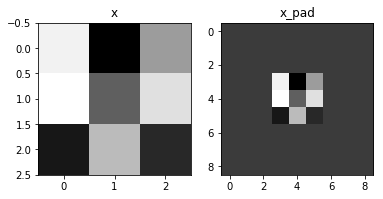

In [5]:
# Application 

np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x,3)

print(x)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

# En Python un assert est une aide au débugage qui vérifie des conditions. 
# Si la condition n’est pas vérifiée alors une AssertionError est soulevée avec, 
# si besoin, un message d’erreur.

assert type(x_pad) == np.ndarray, "Output must be a np array"
assert x_pad.shape == (4, 9, 9, 2), f"Wrong shape: {x_pad.shape} != (4, 9, 9, 2)"
print(x_pad[0, 0:2,:, 0])
assert np.allclose(x_pad[0, 0:2,:, 0], [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 1e-15), "Rows are not padded with zeros"
assert np.allclose(x_pad[0, :, 7:9, 1].transpose(), [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 1e-15), "Columns are not padded with zeros"
assert np.allclose(x_pad[:, 3:6, 3:6, :], x, 1e-15), "Internal values are different"

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
zero_pad_test(zero_pad)

In [6]:
# Single Step of convolution 

# Implementation of a single step of convolution in which you apply the filter to a single position of the input 

In [7]:
# Exercice 2 : Conv Single Step 

def conv_single_step(a_slice_prev,W,b):
    s = np.multiply(a_slice_prev, W)
    Z = np.sum(s)
    Z = Z + float(b)
    return Z 

In [8]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

assert (type(Z) == np.float64 or type(Z) == np.float32), "You must cast the output to float"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221


In [95]:
# Convolution Neural Networks - Forward Pass 

In [11]:
# Exercice 3 : conv_forward 

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """

    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape

    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    pad = hparameters['pad']

    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + (2 * pad)) / stride + 1)
    n_W = int((n_W_prev - f + (2 * pad)) / stride + 1)

    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))

    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):  # loop over the batch of training examples
        a_prev_pad = A_prev[i]  # Select ith training example's padded activation
        for h in range(n_H):  # loop over vertical axis of the output volume
            for w in range(n_W):  # loop over horizontal axis of the output volume
                for c in range(n_C):  # loop over channels (= #filters) of the output volume

                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = stride * h
                    vert_end = stride * h + f
                    horiz_start = stride * w
                    horiz_end = stride * w + f

                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = A_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :]

                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])

    ### END CODE HERE ###

    # Making sure your output shape is correct
    assert (Z.shape == (m, n_H, n_W, n_C))

    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)

    return Z, cache
    

In [13]:
#Application

np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[0,2,1] =\n", Z[0, 2, 1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])


Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


In [15]:
# Pooling Layer 

def pool_forward(A_prev, hparameters, mode="max"):
    """
    Implements the forward pass of the pooling layer
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters
    """

    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### START CODE HERE ###
    for i in range(m):  # loop over the training examples
        for h in range(n_H):  # loop on the vertical axis of the output volume
            for w in range(n_W):  # loop on the horizontal axis of the output volume
                for c in range(n_C):  # loop over the channels of the output volume

                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = stride * w
                    vert_end = stride * w + f
                    horiz_start = stride * h
                    horiz_end = stride * h + f

                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    ### END CODE HERE ###

    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)

    # Making sure your output shape is correct
    assert (A.shape == (m, n_H, n_W, n_C))

    return A, cache

    

In [17]:
# Application 

np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[0.69803203 0.84616065 1.2245077 ]
 [1.96710175 0.84616065 1.23616403]
 [1.96710175 0.86888616 1.23616403]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.03806347  0.07267063 -0.23026896]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.67635169 -0.12013822 -0.24407671]]


In [18]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.13162939 1.51981682 2.18557541]]

 [[1.74481176 1.6924546  1.65980218]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.42944926  0.08446996 -0.27290905]]

 [[ 0.02030094  0.14141479 -0.01231585]
  [ 0.15077452  0.28911175  0.00123239]]]
